In [4]:
import requests, pandas as pd

In [5]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/data_FRED-CBBTCUSD.json'
html = requests.get(url)

In [6]:
html.content

b'{\n    "realtime_start": "2021-10-25",\n    "realtime_end": "2021-10-25",\n    "observation_start": "1600-01-01",\n    "observation_end": "9999-12-31",\n    "units": "lin",\n    "output_type": 1,\n    "file_type": "json",\n    "order_by": "observation_date",\n    "sort_order": "asc",\n    "count": 2520,\n    "offset": 0,\n    "limit": 100000,\n    "observations": [\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2014-12-01",\n            "value": "370"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2014-12-02",\n            "value": "378"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2014-12-03",\n            "value": "378"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n        

In [7]:
Bitcoin_price_json = html.json()

In [8]:
df1=pd.DataFrame(Bitcoin_price_json['observations'])
df1

,realtime_start,realtime_end,date,value
0,2021-10-25,2021-10-25,2014-12-01,370
1,2021-10-25,2021-10-25,2014-12-02,378
2,2021-10-25,2021-10-25,2014-12-03,378
3,2021-10-25,2021-10-25,2014-12-04,377.1
4,2021-10-25,2021-10-25,2014-12-05,.
...,...,...,...,...
2515,2021-10-25,2021-10-25,2021-10-20,66005.17
2516,2021-10-25,2021-10-25,2021-10-21,62152.09
2517,2021-10-25,2021-10-25,2021-10-22,60671.75
2518,2021-10-25,2021-10-25,2021-10-23,61308.09


In [9]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/data_FRED-CBETHUSD.json'
html = requests.get(url)

In [10]:
html.content

b'{\n    "realtime_start": "2021-10-25",\n    "realtime_end": "2021-10-25",\n    "observation_start": "1600-01-01",\n    "observation_end": "9999-12-31",\n    "units": "lin",\n    "output_type": 1,\n    "file_type": "json",\n    "order_by": "observation_date",\n    "sort_order": "asc",\n    "count": 1986,\n    "offset": 0,\n    "limit": 100000,\n    "observations": [\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2016-05-18",\n            "value": "13.18"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2016-05-19",\n            "value": "14.9"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n            "date": "2016-05-20",\n            "value": "14.17"\n        },\n        {\n            "realtime_start": "2021-10-25",\n            "realtime_end": "2021-10-25",\n   

In [11]:
Ethereum_price_json = html.json()

In [12]:
df2=pd.DataFrame(Ethereum_price_json['observations'])
df2

,realtime_start,realtime_end,date,value
0,2021-10-25,2021-10-25,2016-05-18,13.18
1,2021-10-25,2021-10-25,2016-05-19,14.9
2,2021-10-25,2021-10-25,2016-05-20,14.17
3,2021-10-25,2021-10-25,2016-05-21,.
4,2021-10-25,2021-10-25,2016-05-22,.
...,...,...,...,...
1981,2021-10-25,2021-10-25,2021-10-20,4161.88
1982,2021-10-25,2021-10-25,2021-10-21,4054.46
1983,2021-10-25,2021-10-25,2021-10-22,3971.27
1984,2021-10-25,2021-10-25,2021-10-23,4172.78


In [13]:
dfBTC = df1[['date', 'value']]
dfETH = df2[['date', 'value']]

In [14]:
dfBTCed = dfBTC[-1986:].reset_index()
dfBTCed

,index,date,value
0,534,2016-05-18,455.56
1,535,2016-05-19,438.38
2,536,2016-05-20,445.65
3,537,2016-05-21,446.28
4,538,2016-05-22,442.48
...,...,...,...
1981,2515,2021-10-20,66005.17
1982,2516,2021-10-21,62152.09
1983,2517,2021-10-22,60671.75
1984,2518,2021-10-23,61308.09


In [15]:
dfBTCETH = dfBTCed.join(dfETH, rsuffix='_right')

In [16]:
dfBTCETH.rename(columns={'value': 'Bitcoin_Opening_Price'}, inplace=True)
dfBTCETH.rename(columns={'value_right': 'Ethereum_Opening_Price'}, inplace=True)

In [17]:
dfBTCETH.to_csv('BTC_ETH.csv')

In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [19]:
import seaborn as sns
sns.set()

In [20]:
cryptoCoins=pd.read_csv('BTC_ETH.csv')
usefulCryptoCoins = cryptoCoins[['Bitcoin_Opening_Price','Ethereum_Opening_Price']]
moreUsefulCryptoCoins = usefulCryptoCoins[usefulCryptoCoins.Ethereum_Opening_Price!='.']
moreUsefulCryptoCoins.to_csv('useful_BTC_ETH.csv')
moreUsefulCryptoCoins2 = pd.read_csv('useful_BTC_ETH.csv')

[Text(0.5, 1.0, 'Regression of price of Bitcoin on that of Ethereum')]

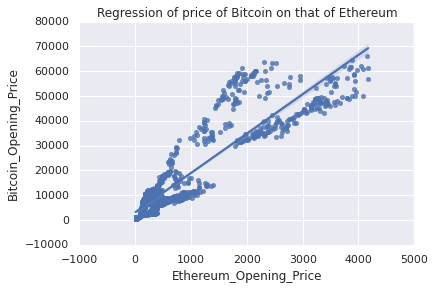

In [31]:
sns.regplot(x='Ethereum_Opening_Price',y='Bitcoin_Opening_Price',data=moreUsefulCryptoCoins2).set(title='Regression of price of Bitcoin on that of Ethereum')

In [22]:
from scipy.stats import linregress

In [23]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=moreUsefulCryptoCoins2.dropna()['Ethereum_Opening_Price'], y=moreUsefulCryptoCoins2.dropna()['Bitcoin_Opening_Price'])

In [25]:
regression_equation = print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
regression_R2 = print('R² = ',np.round(rvalue**2,2))

y =  15.86  * x +  3118.04
R² =  0.84
